In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
direc = '/u/home/gergel/ri_cruncep'
filename1 = 'fluxes.1903-09.nc'
filename2 = 'fluxes.1908-09.nc'
filename3 = 'fluxes.1913-09.nc'
filename4 = 'fluxes.1918-09.nc'
filename5 = 'fluxes.1923-09.nc'
filename6 = 'fluxes.1928-09.nc'

In [3]:
file1 = xr.open_dataset(os.path.join(direc, filename1))
file2 = xr.open_dataset(os.path.join(direc, filename2))
file3 = xr.open_dataset(os.path.join(direc, filename3))
file4 = xr.open_dataset(os.path.join(direc, filename4))
file5 = xr.open_dataset(os.path.join(direc, filename5))
file6 = xr.open_dataset(os.path.join(direc, filename6))

In [4]:
first_30 = xr.concat([file1, file2, file3, file4, file5, file6], dim='time')

In [5]:
filename1 = 'fluxes.1963-09.nc'
filename2 = 'fluxes.1968-09.nc'
filename3 = 'fluxes.1973-09.nc'
filename4 = 'fluxes.1978-09.nc'
filename5 = 'fluxes.1983-09.nc'
filename6 = 'fluxes.1988-09.nc'

In [6]:
file1 = xr.open_dataset(os.path.join(direc, filename1))
file2 = xr.open_dataset(os.path.join(direc, filename2))
file3 = xr.open_dataset(os.path.join(direc, filename3))
file4 = xr.open_dataset(os.path.join(direc, filename4))
file5 = xr.open_dataset(os.path.join(direc, filename5))
file6 = xr.open_dataset(os.path.join(direc, filename6))

In [7]:
third_30 = xr.concat([file1, file2, file3, file4, file5, file6], dim='time')

In [8]:
filename1 = 'fluxes.1993-09.nc'
filename2 = 'fluxes.1998-09.nc'
filename3 = 'fluxes.2003-09.nc'
filename4 = 'fluxes.2008-09.nc'

In [9]:
file1 = xr.open_dataset(os.path.join(direc, filename1))
file2 = xr.open_dataset(os.path.join(direc, filename2))
file3 = xr.open_dataset(os.path.join(direc, filename3))
file4 = xr.open_dataset(os.path.join(direc, filename4))

In [10]:
fourth_30 = xr.concat([file1, file2, file3, file4], dim='time')

In [11]:
filename1 = 'fluxes.1963-09.nc'
filename2 = 'fluxes.1968-09.nc'
filename3 = 'fluxes.1978-09.nc'
filename4 = 'fluxes.1988-09.nc'

In [12]:
direc = '/u/home/gergel/ri_cruncep/second_spinup'
file1 = xr.open_dataset(os.path.join(direc, filename1))
file2 = xr.open_dataset(os.path.join(direc, filename2))
file3 = xr.open_dataset(os.path.join(direc, filename3))
file4 = xr.open_dataset(os.path.join(direc, filename4))

/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [13]:
secondspinup_30 = xr.concat([file1, file2, file3, file4], dim='time')

/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [14]:
third_30.time

<xarray.DataArray 'time' (time: 360)>
array(['1963-09-01T00:00:00.000000000', '1963-10-01T00:00:00.000000000',
       '1963-11-01T00:00:00.000000000', ..., '1993-06-01T00:00:00.000000000',
       '1993-07-01T00:00:00.000000000', '1993-08-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1963-09-01 1963-10-01 1963-11-01 ...
Attributes:
    standard_name:  time
    bounds:         time_bnds

Barrow gridcell: ni = 130, nj = 73 

m is 0.00, b is -10.88


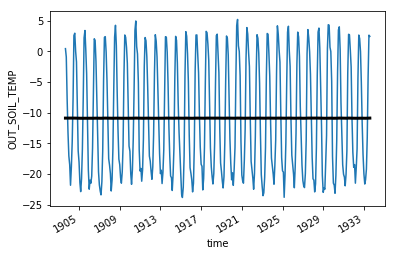

In [15]:
first_30.OUT_SOIL_TEMP.isel(nlayer=0)[:, 73, 130].plot()
ts0 = first_30.OUT_SOIL_TEMP.isel(nlayer=0)[:, 73, 130]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.00, b is -10.96


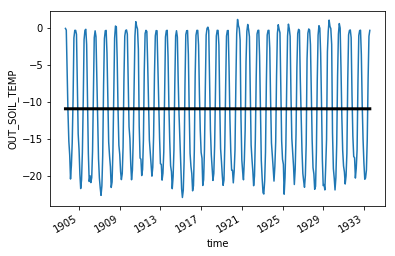

In [16]:
first_30.OUT_SOIL_TEMP.isel(nlayer=1)[:, 73, 130].plot()
ts0 = first_30.OUT_SOIL_TEMP.isel(nlayer=1)[:, 73, 130]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.00, b is -10.94


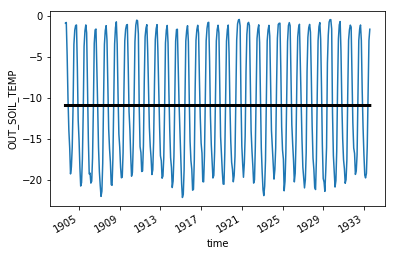

In [17]:
first_30.OUT_SOIL_TEMP.isel(nlayer=2)[:, 73, 130].plot()
ts0 = first_30.OUT_SOIL_TEMP.isel(nlayer=2)[:, 73, 130]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

'ts0 = first_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 73, 130]\nm, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)\nplt.plot(ts0.time, m*ts0 + b, \'-\', color=\'k\', linewidth=3.0)\nprint("m is %.2f, b is %.2f" %(m, b))'

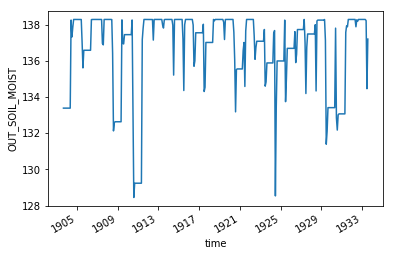

In [18]:
first_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 73, 130].plot()
'''ts0 = first_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 73, 130]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))'''

'ts0 = first_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 73, 130]\nm, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)\nplt.plot(ts0.time, m*ts0 + b, \'-\', color=\'k\', linewidth=3.0)\nprint("m is %.2f, b is %.2f" %(m, b))'

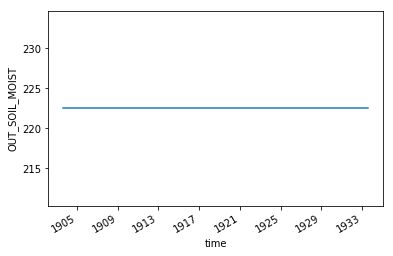

In [19]:
first_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 73, 130].plot()
'''ts0 = first_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 73, 130]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))'''

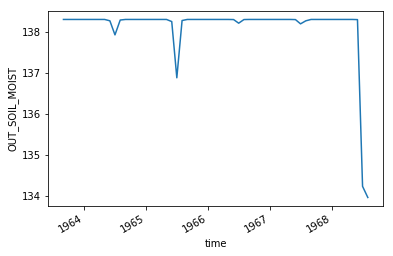

In [20]:
file1.OUT_SOIL_MOIST.isel(nlayer=0)[:, 73, 130].plot()

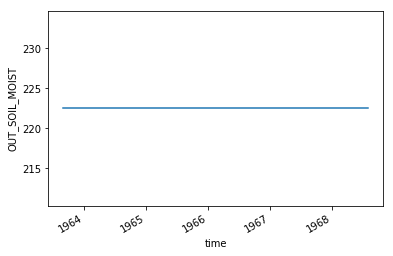

In [21]:
file1.OUT_SOIL_MOIST.isel(nlayer=1)[:, 73, 130].plot()

gridcell in Central Asia: ni = 86, nj = 194

m is 0.01, b is 7.34


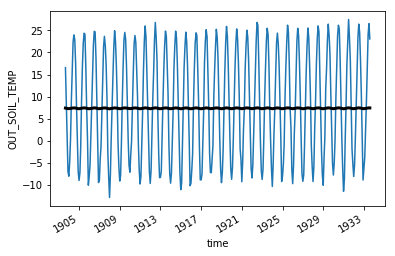

In [22]:
first_30.OUT_SOIL_TEMP.isel(nlayer=0)[:, 194, 86].plot()
ts0 = first_30.OUT_SOIL_TEMP.isel(nlayer=0)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.00, b is 7.79


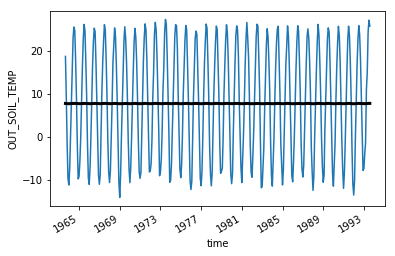

In [23]:
third_30.OUT_SOIL_TEMP.isel(nlayer=0)[:, 194, 86].plot()
ts0 = third_30.OUT_SOIL_TEMP.isel(nlayer=0)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.00, b is 7.74


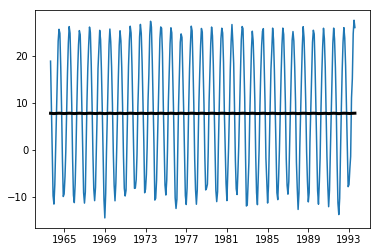

In [24]:
plt.plot(third_30.time, secondspinup_30.OUT_SOIL_TEMP.isel(nlayer=0).values[:, 194, 86])
ts0 = secondspinup_30.OUT_SOIL_TEMP.isel(nlayer=0)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(third_30.time.values)), ts0, 1)
plt.plot(third_30.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.00, b is 7.57


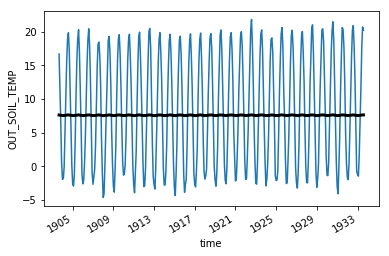

In [25]:
first_30.OUT_SOIL_TEMP.isel(nlayer=1)[:, 194, 86].plot()
ts0 = first_30.OUT_SOIL_TEMP.isel(nlayer=1)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.00, b is 8.09


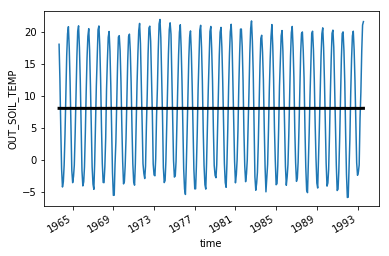

In [26]:
third_30.OUT_SOIL_TEMP.isel(nlayer=1)[:, 194, 86].plot()
ts0 = third_30.OUT_SOIL_TEMP.isel(nlayer=1)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.00, b is 8.05


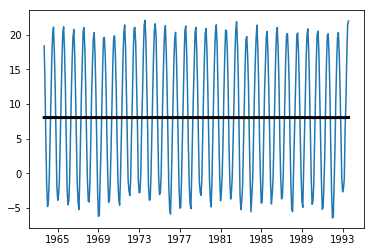

In [27]:
plt.plot(third_30.time, secondspinup_30.OUT_SOIL_TEMP.isel(nlayer=1).values[:, 194, 86])
ts0 = secondspinup_30.OUT_SOIL_TEMP.isel(nlayer=1)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(third_30.time.values)), ts0, 1)
plt.plot(third_30.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.00, b is 7.67


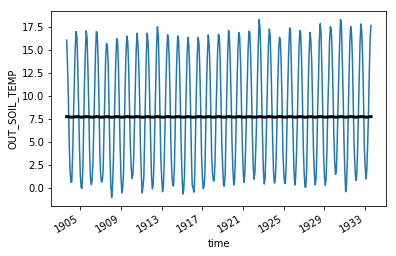

In [28]:
first_30.OUT_SOIL_TEMP.isel(nlayer=2)[:, 194, 86].plot()
ts0 = first_30.OUT_SOIL_TEMP.isel(nlayer=2)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is -0.00, b is 8.23


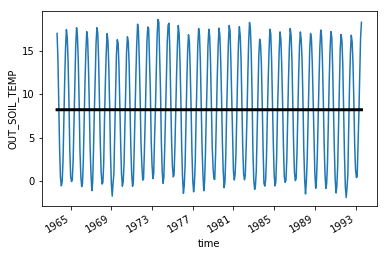

In [29]:
third_30.OUT_SOIL_TEMP.isel(nlayer=2)[:, 194, 86].plot()
ts0 = third_30.OUT_SOIL_TEMP.isel(nlayer=2)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is -0.00, b is 8.21


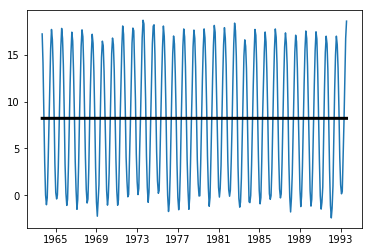

In [30]:
plt.plot(third_30.time, secondspinup_30.OUT_SOIL_TEMP.isel(nlayer=2).values[:, 194, 86])
ts0 = secondspinup_30.OUT_SOIL_TEMP.isel(nlayer=2)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(third_30.time.values)), ts0, 1)
plt.plot(third_30.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is -0.03, b is 50.81


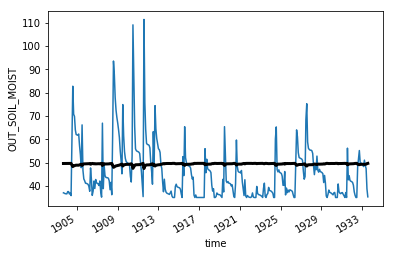

In [31]:
first_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 194, 86].plot()
ts0 = first_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.01, b is 40.62


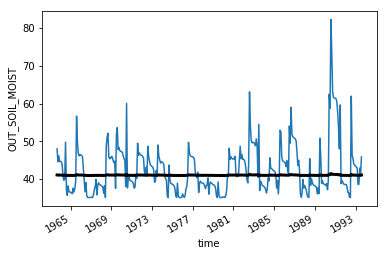

In [32]:
third_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 194, 86].plot()
ts0 = third_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is 0.01, b is 41.05


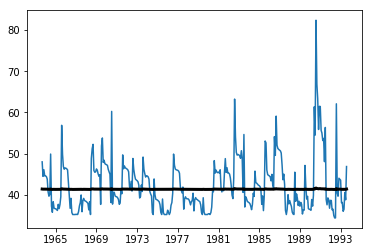

In [33]:
plt.plot(third_30.time, secondspinup_30.OUT_SOIL_MOIST.isel(nlayer=0).values[:, 194, 86])
ts0 = secondspinup_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(third_30.time.values)), ts0, 1)
plt.plot(third_30.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is -0.00, b is 46.85


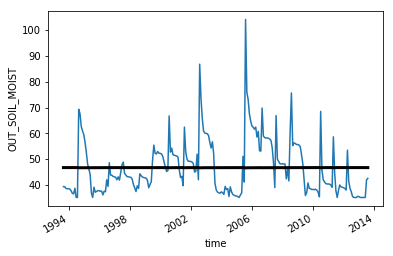

In [34]:
fourth_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 194, 86].plot()
ts0 = fourth_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is -0.12, b is 346.90


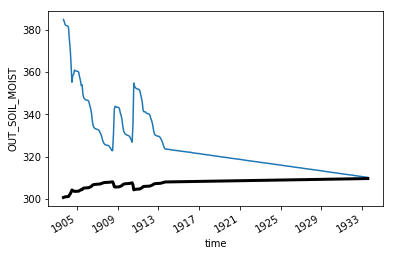

In [35]:
first_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 194, 86].plot()
ts0 = first_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

'ts0 = third_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 194, 86]\nm, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)\nplt.plot(ts0.time, m*ts0 + b, \'-\', color=\'k\', linewidth=3.0)\nprint("m is %.2f, b is %.2f" %(m, b))'

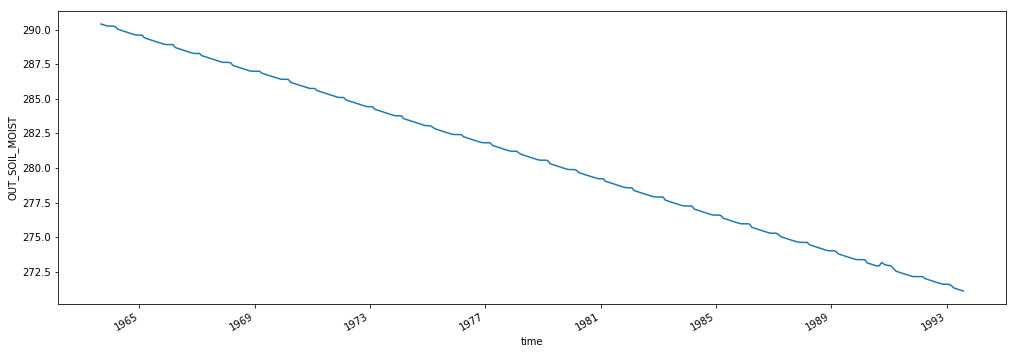

In [77]:
plt.figure(figsize=(17, 6))
third_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 194, 86].plot()
'''ts0 = third_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))'''

m is -0.00, b is 256.23


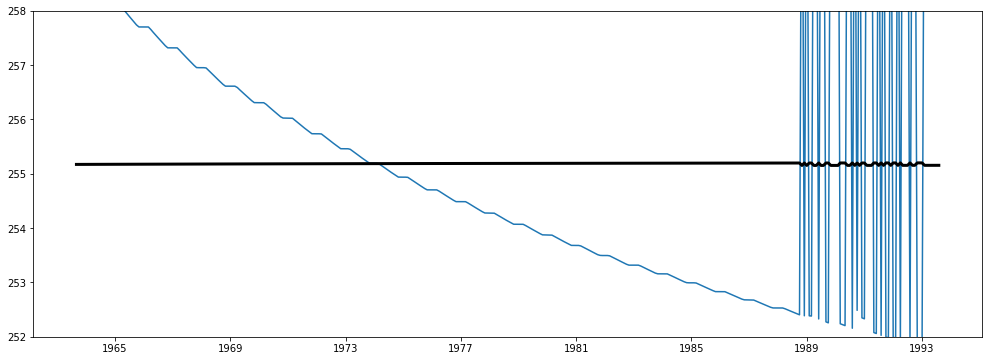

In [37]:
plt.figure(figsize=(17, 6))
plt.plot(third_30.time, secondspinup_30.OUT_SOIL_MOIST.isel(nlayer=1).values[:, 194, 86])
ts0 = secondspinup_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(third_30.time.values)), ts0, 1)
plt.plot(third_30.time, m*ts0 + b, '-', color='k', linewidth=3.0)
plt.ylim([252, 258])
print("m is %.2f, b is %.2f" %(m, b))

m is -0.05, b is 271.33


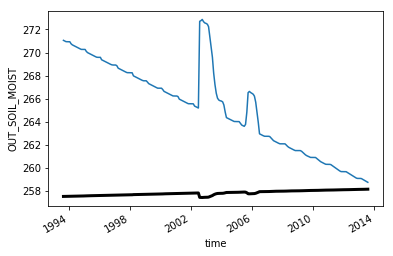

In [38]:
fourth_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 194, 86].plot()
ts0 = fourth_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is -0.03, b is 99.70


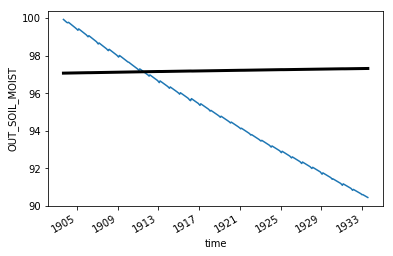

In [39]:
first_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 194, 86].plot()
ts0 = first_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is -0.01, b is 84.01


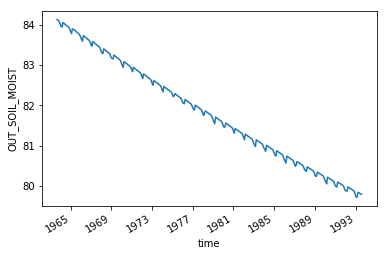

In [40]:
third_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 194, 86].plot()
ts0 = third_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
# plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

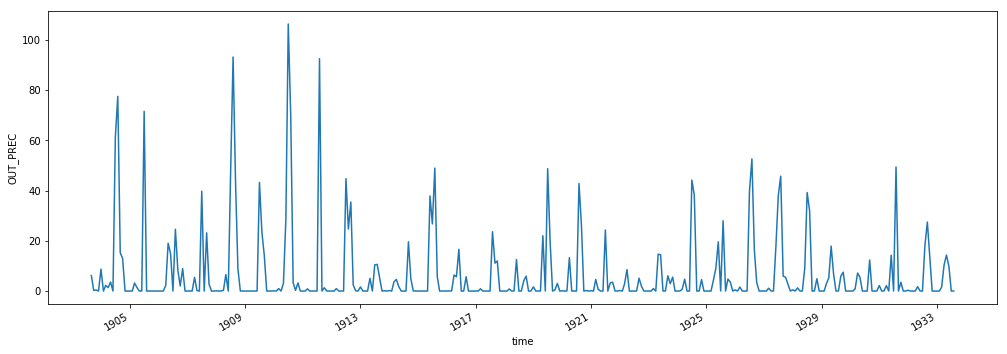

In [41]:
plt.figure(figsize=(17, 6))
first_30.OUT_PREC[:, 194, 86].plot()

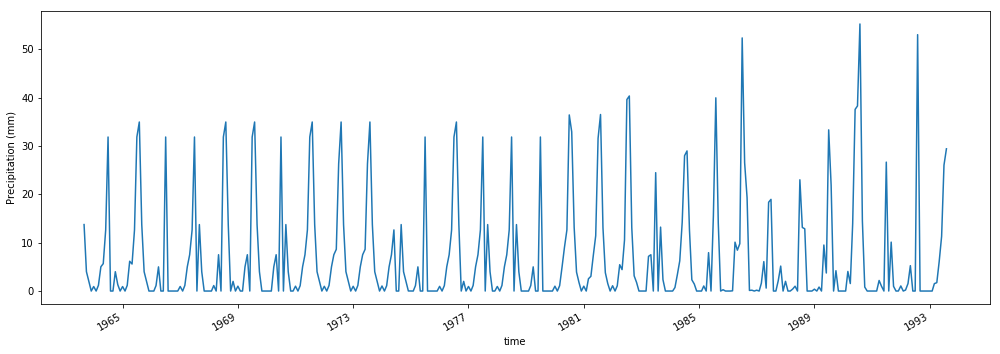

In [42]:
plt.figure(figsize=(17, 6))
third_30.OUT_PREC[:, 194, 86].plot()
plt.ylabel('Precipitation (mm)')

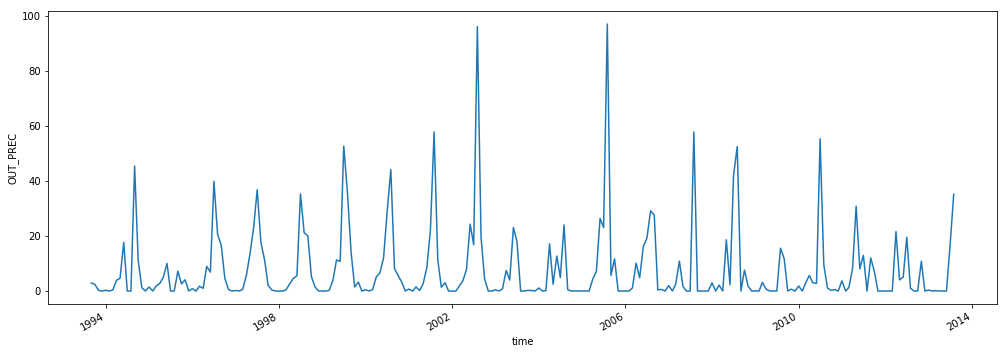

In [43]:
plt.figure(figsize=(17, 6))
fourth_30.OUT_PREC[:, 194, 86].plot()

In [44]:
prec_grps = third_30.OUT_PREC.groupby('time.month').mean('time')

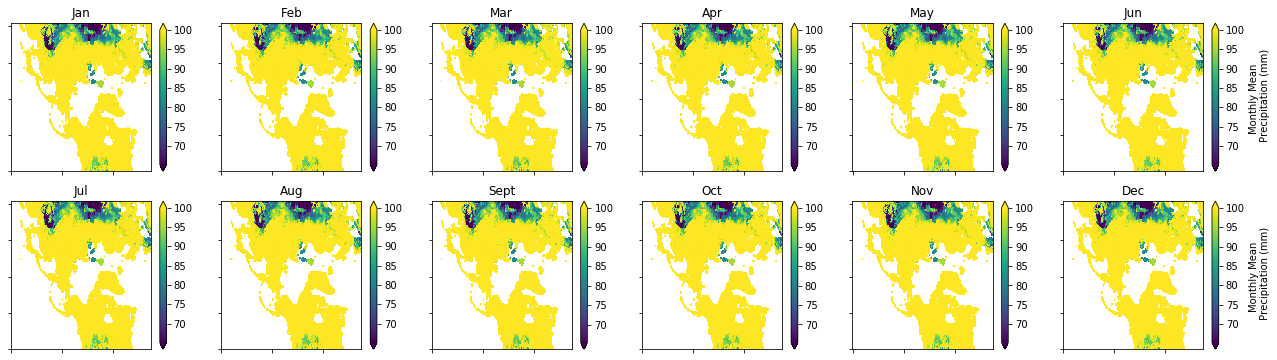

In [51]:
fig, axes = plt.subplots(2, 6, figsize=(22, 6))

prec_grps[0, :, :].plot(robust=True, ax=axes[0, 0], add_labels=False)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

'''plt.setp(axes[0, 0].get_xticklabels(), visible=False)
plt.setp(axes[0, 0].get_yticklabels(), visible=False)'''
prec_grps[1, :, :].plot(robust=True, ax=axes[0, 1], add_labels=False)
prec_grps[2, :, :].plot(robust=True, ax=axes[0, 2], add_labels=False)
prec_grps[3, :, :].plot(robust=True, ax=axes[0, 3], add_labels=False)
prec_grps[4, :, :].plot(robust=True, ax=axes[0, 4], add_labels=False)
prec_grps[5, :, :].plot(robust=True, ax=axes[0, 5], add_labels=False, cbar_kwargs={'label':'Monthly Mean \n Precipitation (mm)'})
prec_grps[6, :, :].plot(robust=True, ax=axes[1, 0], add_labels=False)
prec_grps[7, :, :].plot(robust=True, ax=axes[1, 1], add_labels=False)
prec_grps[8, :, :].plot(robust=True, ax=axes[1, 2], add_labels=False)
prec_grps[9, :, :].plot(robust=True, ax=axes[1, 3], add_labels=False)
prec_grps[10, :, :].plot(robust=True, ax=axes[1, 4], add_labels=False)
prec_grps[11, :, :].plot(robust=True, ax=axes[1, 5], add_labels=False, cbar_kwargs={'label':'Monthly Mean \n Precipitation (mm)'})

count = 0
for i in np.arange(0, 2): 
    for j in np.arange(0, 6):
        plt.setp(axes[i, j].get_xticklabels(), visible=False)
        plt.setp(axes[i, j].get_yticklabels(), visible=False)
        axes[i, j].set_title(months[count])
        count += 1


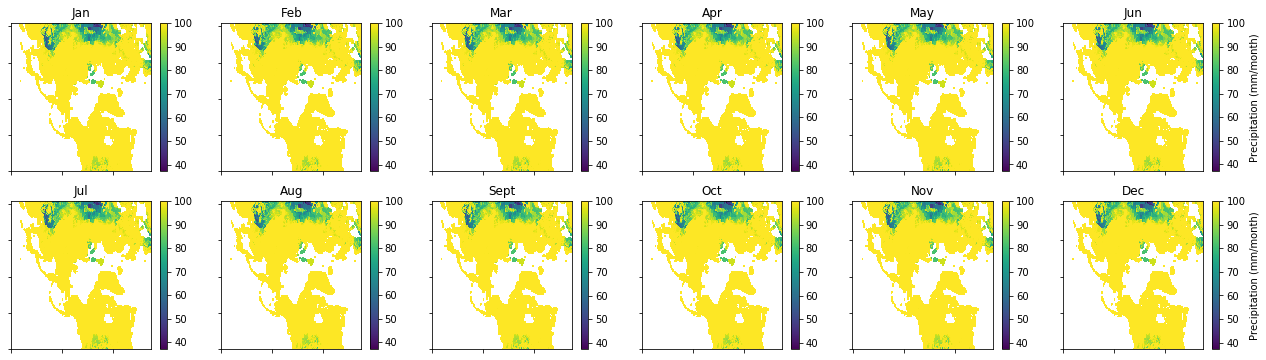

In [61]:
fig, axes = plt.subplots(2, 6, figsize=(22, 6))

prec_grps[0, :, :].plot(ax=axes[0, 0], add_labels=False)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

'''plt.setp(axes[0, 0].get_xticklabels(), visible=False)
plt.setp(axes[0, 0].get_yticklabels(), visible=False)'''
prec_grps[1, :, :].plot(ax=axes[0, 1], add_labels=False)
prec_grps[2, :, :].plot(ax=axes[0, 2], add_labels=False)
prec_grps[3, :, :].plot(ax=axes[0, 3], add_labels=False)
prec_grps[4, :, :].plot(ax=axes[0, 4], add_labels=False)
prec_grps[5, :, :].plot(ax=axes[0, 5], add_labels=False, cbar_kwargs={'label':'Precipitation (mm/month)'})
prec_grps[6, :, :].plot(ax=axes[1, 0], add_labels=False)
prec_grps[7, :, :].plot(ax=axes[1, 1], add_labels=False)
prec_grps[8, :, :].plot(ax=axes[1, 2], add_labels=False)
prec_grps[9, :, :].plot(ax=axes[1, 3], add_labels=False)
prec_grps[10, :, :].plot(ax=axes[1, 4], add_labels=False)
prec_grps[11, :, :].plot(ax=axes[1, 5], add_labels=False, cbar_kwargs={'label':'Precipitation (mm/month)'})

count = 0
for i in np.arange(0, 2): 
    for j in np.arange(0, 6):
        plt.setp(axes[i, j].get_xticklabels(), visible=False)
        plt.setp(axes[i, j].get_yticklabels(), visible=False)
        axes[i, j].set_title(months[count])
        count += 1

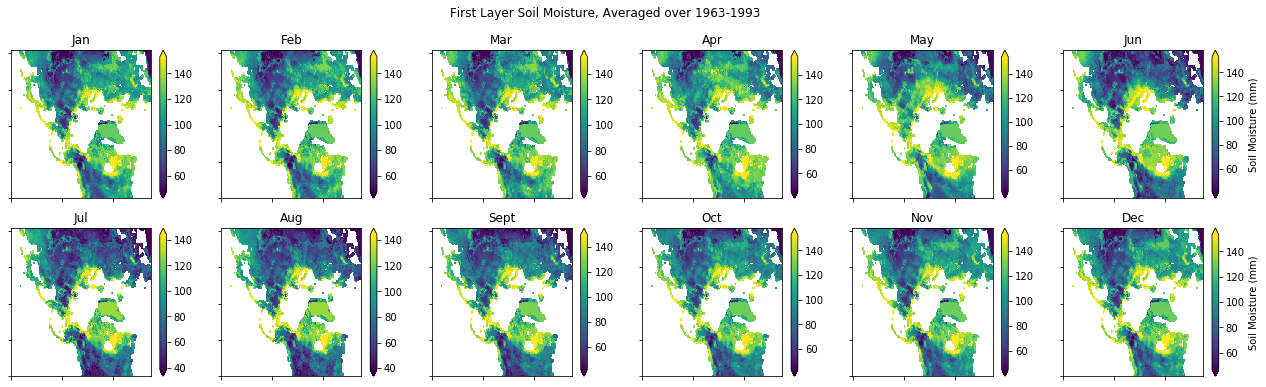

In [46]:
prec_grps = third_30.OUT_SOIL_MOIST.isel(nlayer=0).groupby('time.month').mean('time')
fig, axes = plt.subplots(2, 6, figsize=(22, 6))

prec_grps[0, :, :].plot(robust=True, ax=axes[0, 0], add_labels=False)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

'''plt.setp(axes[0, 0].get_xticklabels(), visible=False)
plt.setp(axes[0, 0].get_yticklabels(), visible=False)'''
prec_grps[1, :, :].plot(robust=True, ax=axes[0, 1], add_labels=False)
prec_grps[2, :, :].plot(robust=True, ax=axes[0, 2], add_labels=False)
prec_grps[3, :, :].plot(robust=True, ax=axes[0, 3], add_labels=False)
prec_grps[4, :, :].plot(robust=True, ax=axes[0, 4], add_labels=False)
prec_grps[5, :, :].plot(robust=True, ax=axes[0, 5], add_labels=False, cbar_kwargs={'label':'Soil Moisture (mm)'})
prec_grps[6, :, :].plot(robust=True, ax=axes[1, 0], add_labels=False)
prec_grps[7, :, :].plot(robust=True, ax=axes[1, 1], add_labels=False)
prec_grps[8, :, :].plot(robust=True, ax=axes[1, 2], add_labels=False)
prec_grps[9, :, :].plot(robust=True, ax=axes[1, 3], add_labels=False)
prec_grps[10, :, :].plot(robust=True, ax=axes[1, 4], add_labels=False)
prec_grps[11, :, :].plot(robust=True, ax=axes[1, 5], add_labels=False, cbar_kwargs={'label':'Soil Moisture (mm)'})

count = 0
for i in np.arange(0, 2): 
    for j in np.arange(0, 6):
        plt.setp(axes[i, j].get_xticklabels(), visible=False)
        plt.setp(axes[i, j].get_yticklabels(), visible=False)
        axes[i, j].set_title(months[count])
        count += 1
plt.suptitle('Monthly Mean First Layer Soil Moisture, Averaged over 1963-1993')

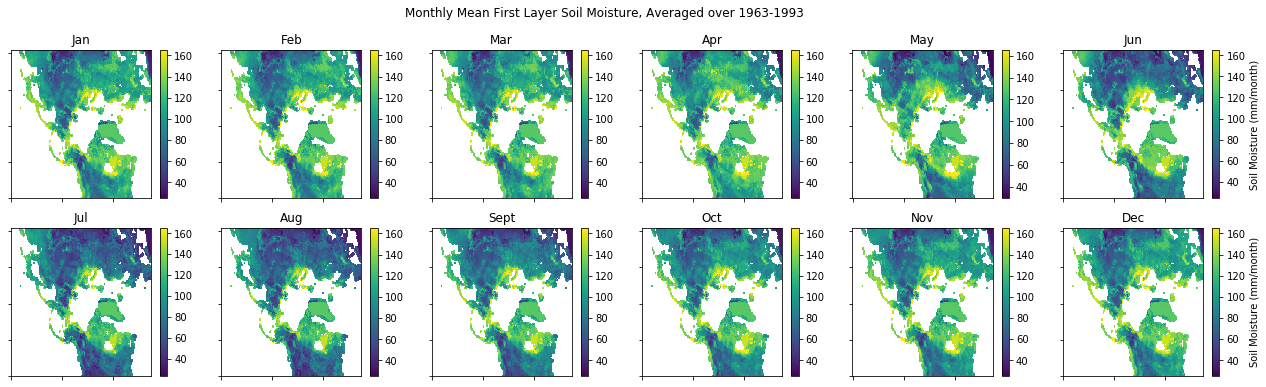

In [54]:
prec_grps = third_30.OUT_SOIL_MOIST.isel(nlayer=0).groupby('time.month').mean('time')
fig, axes = plt.subplots(2, 6, figsize=(22, 6))

prec_grps[0, :, :].plot(ax=axes[0, 0], add_labels=False)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

'''plt.setp(axes[0, 0].get_xticklabels(), visible=False)
plt.setp(axes[0, 0].get_yticklabels(), visible=False)'''
prec_grps[1, :, :].plot(ax=axes[0, 1], add_labels=False)
prec_grps[2, :, :].plot(ax=axes[0, 2], add_labels=False)
prec_grps[3, :, :].plot(ax=axes[0, 3], add_labels=False)
prec_grps[4, :, :].plot(ax=axes[0, 4], add_labels=False)
prec_grps[5, :, :].plot(ax=axes[0, 5], add_labels=False, cbar_kwargs={'label':'Soil Moisture (mm/month)'})
prec_grps[6, :, :].plot(ax=axes[1, 0], add_labels=False)
prec_grps[7, :, :].plot(ax=axes[1, 1], add_labels=False)
prec_grps[8, :, :].plot(ax=axes[1, 2], add_labels=False)
prec_grps[9, :, :].plot(ax=axes[1, 3], add_labels=False)
prec_grps[10, :, :].plot(ax=axes[1, 4], add_labels=False)
prec_grps[11, :, :].plot(ax=axes[1, 5], add_labels=False, cbar_kwargs={'label':'Soil Moisture (mm/month)'})

count = 0
for i in np.arange(0, 2): 
    for j in np.arange(0, 6):
        plt.setp(axes[i, j].get_xticklabels(), visible=False)
        plt.setp(axes[i, j].get_yticklabels(), visible=False)
        axes[i, j].set_title(months[count])
        count += 1
plt.suptitle('Monthly Mean First Layer Soil Moisture, Averaged over 1963-1993')

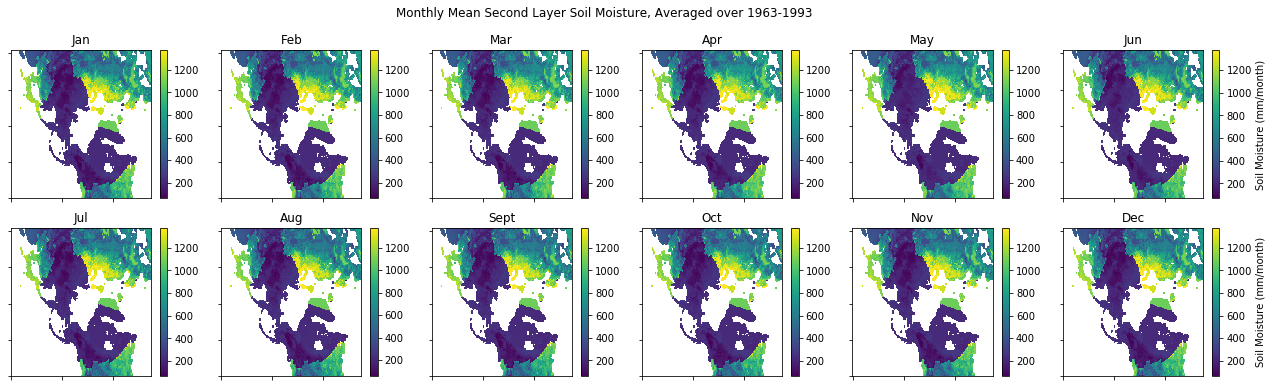

In [55]:
prec_grps = third_30.OUT_SOIL_MOIST.isel(nlayer=1).groupby('time.month').mean('time')
fig, axes = plt.subplots(2, 6, figsize=(22, 6))

prec_grps[0, :, :].plot(ax=axes[0, 0], add_labels=False)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

'''plt.setp(axes[0, 0].get_xticklabels(), visible=False)
plt.setp(axes[0, 0].get_yticklabels(), visible=False)'''
prec_grps[1, :, :].plot(ax=axes[0, 1], add_labels=False)
prec_grps[2, :, :].plot(ax=axes[0, 2], add_labels=False)
prec_grps[3, :, :].plot(ax=axes[0, 3], add_labels=False)
prec_grps[4, :, :].plot(ax=axes[0, 4], add_labels=False)
prec_grps[5, :, :].plot(ax=axes[0, 5], add_labels=False, cbar_kwargs={'label':'Soil Moisture (mm/month)'})
prec_grps[6, :, :].plot(ax=axes[1, 0], add_labels=False)
prec_grps[7, :, :].plot(ax=axes[1, 1], add_labels=False)
prec_grps[8, :, :].plot(ax=axes[1, 2], add_labels=False)
prec_grps[9, :, :].plot(ax=axes[1, 3], add_labels=False)
prec_grps[10, :, :].plot(ax=axes[1, 4], add_labels=False)
prec_grps[11, :, :].plot(ax=axes[1, 5], add_labels=False, cbar_kwargs={'label':'Soil Moisture (mm/month)'})

count = 0
for i in np.arange(0, 2): 
    for j in np.arange(0, 6):
        plt.setp(axes[i, j].get_xticklabels(), visible=False)
        plt.setp(axes[i, j].get_yticklabels(), visible=False)
        axes[i, j].set_title(months[count])
        count += 1
plt.suptitle('Monthly Mean Second Layer Soil Moisture, Averaged over 1963-1993')

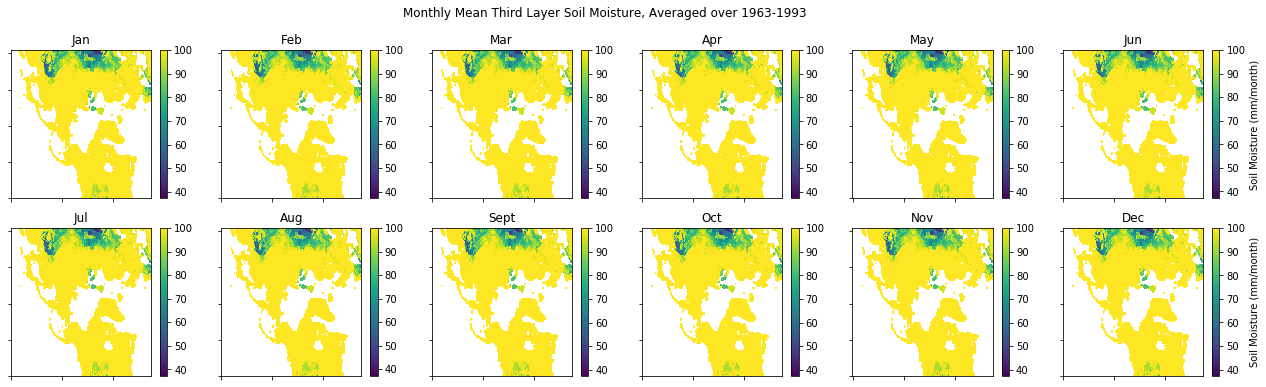

In [56]:
prec_grps = third_30.OUT_SOIL_MOIST.isel(nlayer=2).groupby('time.month').mean('time')
fig, axes = plt.subplots(2, 6, figsize=(22, 6))

prec_grps[0, :, :].plot(ax=axes[0, 0], add_labels=False)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

'''plt.setp(axes[0, 0].get_xticklabels(), visible=False)
plt.setp(axes[0, 0].get_yticklabels(), visible=False)'''
prec_grps[1, :, :].plot(ax=axes[0, 1], add_labels=False)
prec_grps[2, :, :].plot(ax=axes[0, 2], add_labels=False)
prec_grps[3, :, :].plot(ax=axes[0, 3], add_labels=False)
prec_grps[4, :, :].plot(ax=axes[0, 4], add_labels=False)
prec_grps[5, :, :].plot(ax=axes[0, 5], add_labels=False, cbar_kwargs={'label':'Soil Moisture (mm/month)'})
prec_grps[6, :, :].plot(ax=axes[1, 0], add_labels=False)
prec_grps[7, :, :].plot(ax=axes[1, 1], add_labels=False)
prec_grps[8, :, :].plot(ax=axes[1, 2], add_labels=False)
prec_grps[9, :, :].plot(ax=axes[1, 3], add_labels=False)
prec_grps[10, :, :].plot(ax=axes[1, 4], add_labels=False)
prec_grps[11, :, :].plot(ax=axes[1, 5], add_labels=False, cbar_kwargs={'label':'Soil Moisture (mm/month)'})

count = 0
for i in np.arange(0, 2): 
    for j in np.arange(0, 6):
        plt.setp(axes[i, j].get_xticklabels(), visible=False)
        plt.setp(axes[i, j].get_yticklabels(), visible=False)
        axes[i, j].set_title(months[count])
        count += 1
plt.suptitle('Monthly Mean Third Layer Soil Moisture, Averaged over 1963-1993')

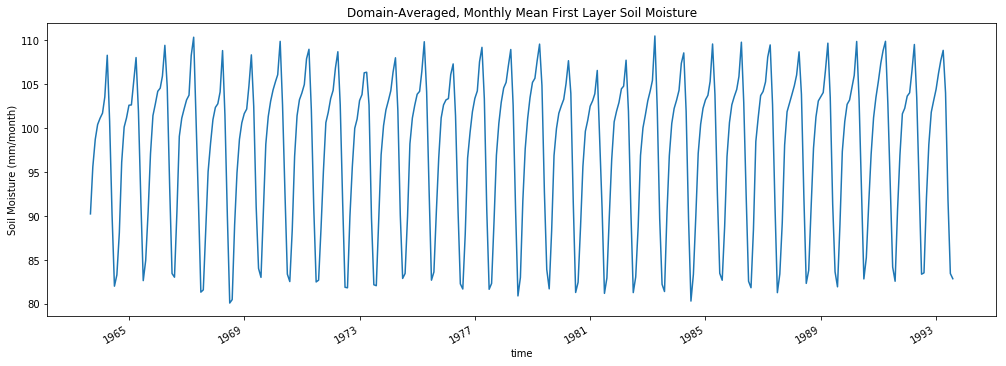

In [58]:
plt.figure(figsize=(17, 6))
j = third_30.OUT_SOIL_MOIST.isel(nlayer=0).groupby('time.month').mean(dim=['nj', 'ni']).plot()
plt.ylabel('Soil Moisture (mm/month)')
plt.title('Domain-Averaged, Monthly Mean First Layer Soil Moisture')

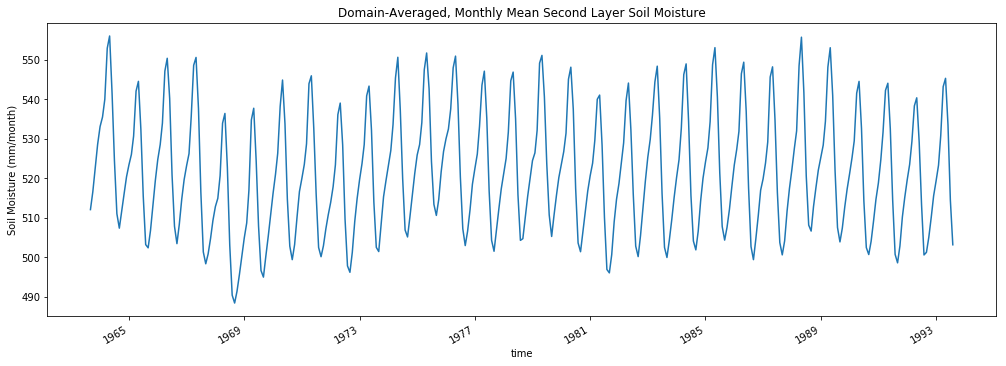

In [63]:
plt.figure(figsize=(17, 6))
j = third_30.OUT_SOIL_MOIST.isel(nlayer=1).groupby('time.month').mean(dim=['nj', 'ni']).plot()
plt.ylabel('Soil Moisture (mm/month)')
plt.title('Domain-Averaged, Monthly Mean Second Layer Soil Moisture')

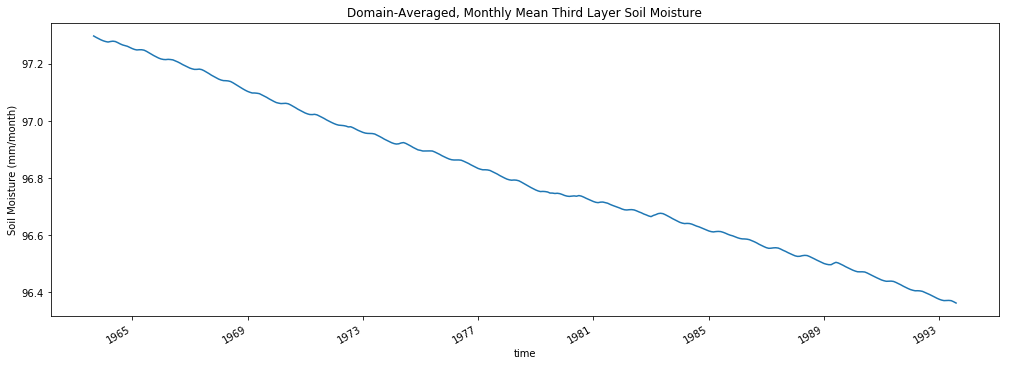

In [60]:
plt.figure(figsize=(17, 6))
j = third_30.OUT_SOIL_MOIST.isel(nlayer=2).groupby('time.month').mean(dim=['nj', 'ni']).plot()
plt.ylabel('Soil Moisture (mm/month)')
plt.title('Domain-Averaged, Monthly Mean Third Layer Soil Moisture')

m is -0.03, b is 77.61


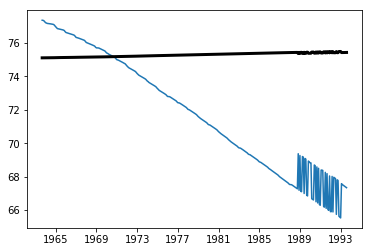

In [49]:
plt.plot(third_30.time, secondspinup_30.OUT_SOIL_MOIST.isel(nlayer=2).values[:, 194, 86])
ts0 = secondspinup_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(third_30.time.values)), ts0, 1)
plt.plot(third_30.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

m is -0.01, b is 79.73


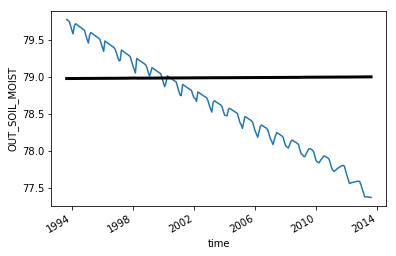

In [50]:
fourth_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 194, 86].plot()
ts0 = fourth_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))

look at soil depths for gridcell in Central Asia 

In [64]:
direc = '/u/home/gergel'
param_file = 'vic_params_wr50a_vic5.0.dev_20160328.nc'
params = xr.open_dataset(os.path.join(direc, param_file))

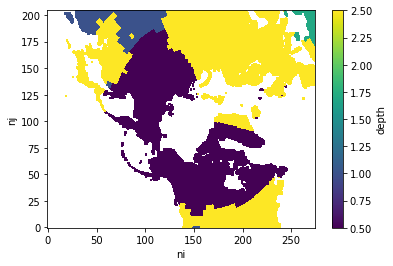

In [68]:
params.depth.isel(nlayer=1).plot()

In [67]:
params.depth[:, 194, 86]

<xarray.DataArray 'depth' (nlayer: 3)>
array([ 0.3     ,  1.      ,  0.222717])
Coordinates:
    yc       float64 40.87
    xc       float64 104.5
Dimensions without coordinates: nlayer
Attributes:
    units:        m
    description:  Thickness of each soil moisture layer
    long_name:    depth

In [69]:
params.depth[:, 180, 160]

<xarray.DataArray 'depth' (nlayer: 3)>
array([ 0.3     ,  2.5     ,  0.205761])
Coordinates:
    yc       float64 56.33
    xc       float64 64.48
Dimensions without coordinates: nlayer
Attributes:
    units:        m
    description:  Thickness of each soil moisture layer
    long_name:    depth

In [78]:
params.depth[:, 30, 160]

<xarray.DataArray 'depth' (nlayer: 3)>
array([ 0.3     ,  0.5     ,  0.190476])
Coordinates:
    yc       float64 57.61
    xc       float64 -112.4
Dimensions without coordinates: nlayer
Attributes:
    units:        m
    description:  Thickness of each soil moisture layer
    long_name:    depth

gridcell in Europe (second layer depth of 2.5)

'ts0 = third_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 194, 86]\nm, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)\nplt.plot(ts0.time, m*ts0 + b, \'-\', color=\'k\', linewidth=3.0)\nprint("m is %.2f, b is %.2f" %(m, b))'

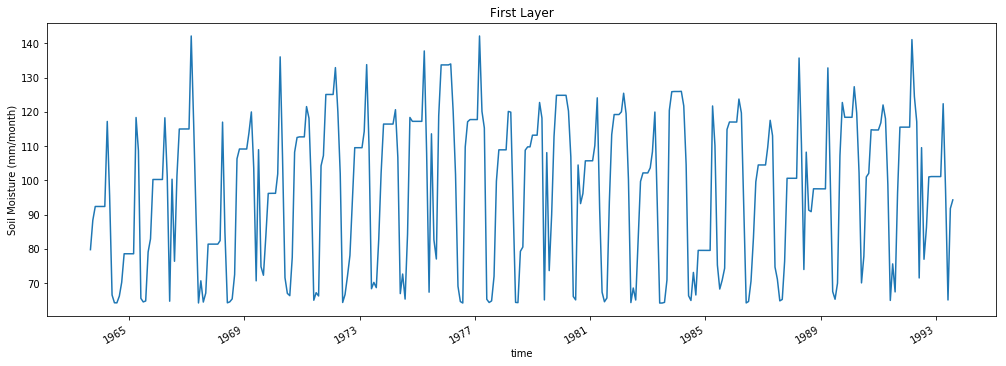

In [74]:
plt.figure(figsize=(17, 6))
third_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 180, 160].plot()
plt.ylabel('Soil Moisture (mm/month)')
plt.title('First Layer')
'''ts0 = third_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 194, 86]
m, b = np.polyfit(np.arange(0, len(ts0.time.values)), ts0, 1)
plt.plot(ts0.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %.2f, b is %.2f" %(m, b))'''

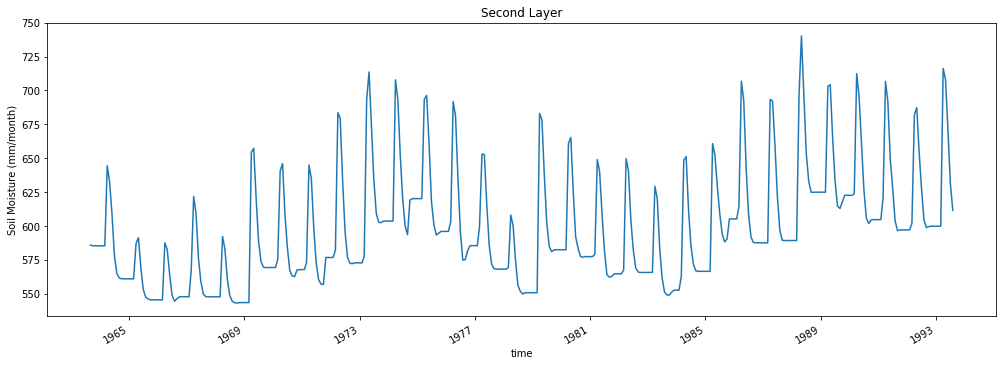

In [75]:
plt.figure(figsize=(17, 6))
third_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 180, 160].plot()
plt.ylabel('Soil Moisture (mm/month)')
plt.title('Second Layer')

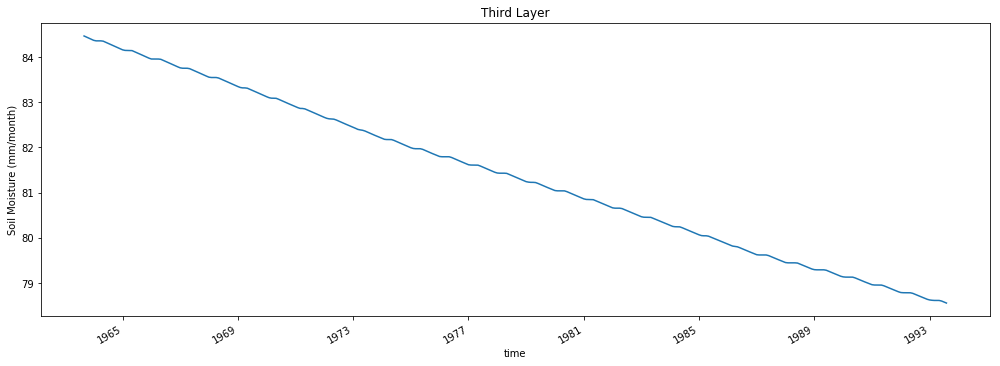

In [76]:
plt.figure(figsize=(17, 6))
third_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 180, 160].plot()
plt.ylabel('Soil Moisture (mm/month)')
plt.title('Third Layer')

gridcell in Canada (second layer depth of 0.5m)

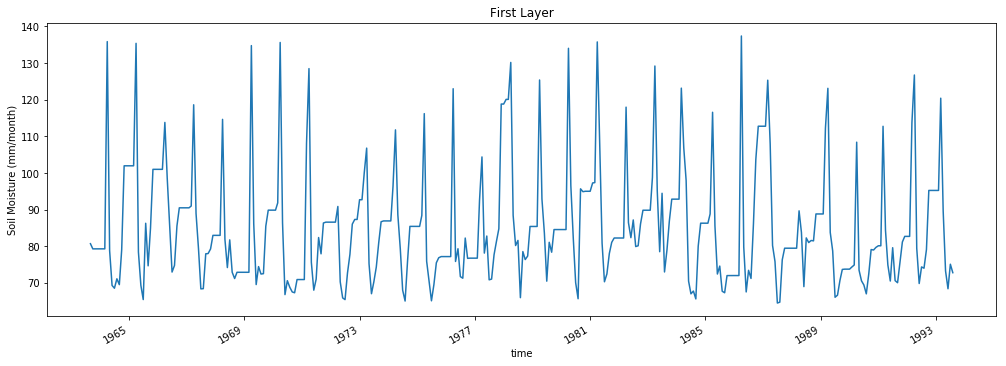

In [80]:
plt.figure(figsize=(17, 6))
third_30.OUT_SOIL_MOIST.isel(nlayer=0)[:, 30, 160].plot()
plt.ylabel('Soil Moisture (mm/month)')
plt.title('First Layer')

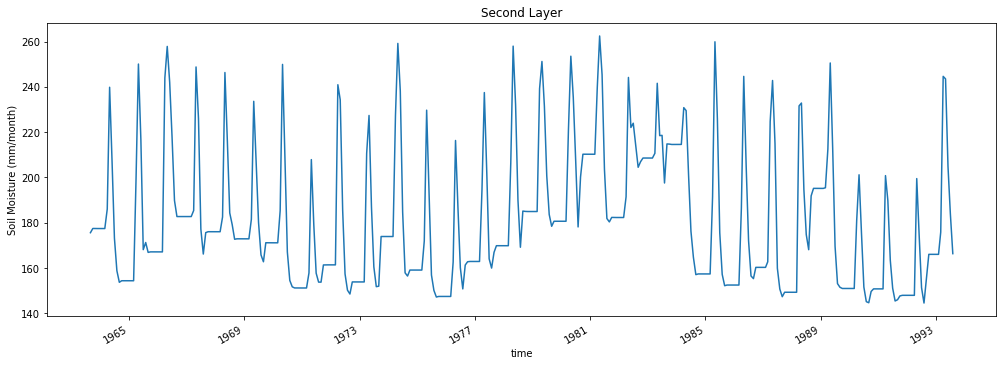

In [81]:
plt.figure(figsize=(17, 6))
third_30.OUT_SOIL_MOIST.isel(nlayer=1)[:, 30, 160].plot()
plt.ylabel('Soil Moisture (mm/month)')
plt.title('Second Layer')

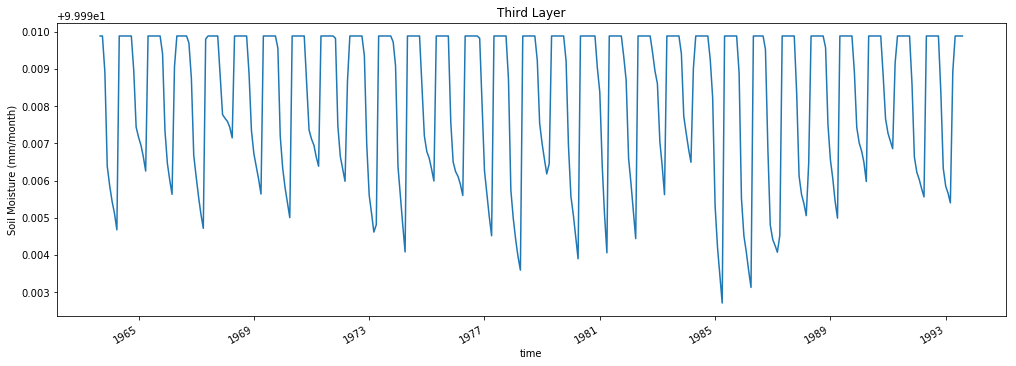

In [82]:
plt.figure(figsize=(17, 6))
third_30.OUT_SOIL_MOIST.isel(nlayer=2)[:, 30, 160].plot()
plt.ylabel('Soil Moisture (mm/month)')
plt.title('Third Layer')